In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("NFWBS_PUF_2016_data.csv")

In [4]:
def filter_columns(df, include_strings):
    """
    Filter DataFrame columns containing any of the strings in include_strings.
    
    Args:
    df (pandas.DataFrame): Input DataFrame.
    include_strings (list): List of strings that need to be included in the column names.
    
    Returns:
    pandas.DataFrame: Filtered DataFrame.
    """
    filtered_columns = []
    for col in df.columns:
        if any(include_string in col.lower() for include_string in include_strings):
            filtered_columns.append(col)
    return df[filtered_columns]

In [5]:
df = filter_columns(df, include_strings=['fwb'])

In [6]:
def rename_columns(df):
   # convert form camel case to snake case
   df.columns = (df.columns
                  .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                  .str.lower()
               )
   # convert " " to _
   df.columns = df.columns.str.replace(' ', '_')
   return df

In [13]:
def drop_negative_values(df):
    """
    Drop all values in the DataFrame that are less than 0.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        pandas.DataFrame: DataFrame with negative values dropped.
    """
    df_without_null = df[df >= 0]
    print(len(df)-len(df_without_null.dropna()))
    return df_without_null.dropna()

In [14]:
df = drop_negative_values(df)

19


In [9]:
target_column = [col for col in df.columns if 'score' in col.lower()]
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train = train_set.drop(columns=target_column, errors='ignore')
train_labels = train_set[target_column]

test = test_set.drop(columns=target_column, errors='ignore')
test_labels = test_set[target_column]

# Model 1: Linear Reg

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train, train_labels)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(train)
lin_mse = mean_squared_error(np.array(train_labels), predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.050839331632617

In [41]:
scores = cross_val_score(lin_reg, train, train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [42]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores)

Scores: [4.69462014 3.2897437  3.37411104 3.37981908 3.27026239 4.43249971
 4.38890887 5.41823811 3.54885424 4.47787182]
Mean: 4.027492910127311
Standard deviation: 0.7120309203219158


# 2. Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train, train_labels)

DecisionTreeRegressor()

In [44]:
predictions = tree_reg.predict(train)
tree_mse = mean_squared_error(train_labels, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.8238524604182516

In [45]:
scores = cross_val_score(tree_reg, train, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [2.34068865 2.66460412 4.63087383 2.73583674 2.62836515 2.55598709
 3.76609925 2.39714819 3.33392897 2.46753709]
Mean: 2.9521069078285067
Standard deviation: 0.702452821057397


# 3.Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train, train_labels)

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [48]:
predictions = forest_reg.predict(train)
forest_mse = mean_squared_error(train_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

1.0396095390803517


In [49]:
scores = cross_val_score(forest_reg, train, train_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\hamin\anaconda3\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(forest_rmse_scores)

Scores: [1.81001058 1.76694823 2.78437993 1.83371619 2.04354026 1.75418819
 2.20275525 1.85768709 1.96816591 1.75760749]
Mean: 1.977899911993585
Standard deviation: 0.3019729358539942


# 4. ANN Models

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 1429.3430 - rmse: 34.6238 - val_loss: 287.6889 - val_rmse: 16.7816
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 155.1178 - rmse: 12.1176 - val_loss: 87.9412 - val_rmse: 9.1309
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 87.2066 - rmse: 9.1355 - val_loss: 82.2461 - val_rmse: 8.8133
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 83.5469 - rmse: 8.9362 - val_loss: 78.9549 - val_rmse: 8.6252
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 79.8504 - rmse: 8.7327 - val_loss: 75.3884 - val_rmse: 8.4642
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 75.5003 - rmse: 8.5053 - val_loss: 71.5690 - val_rmse: 8.2247
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 70.6906 - rmse: 8.2701 - val_loss: 66.6284 - val_rmse: 7.9545
Epoch 8/100
128/128 [=============

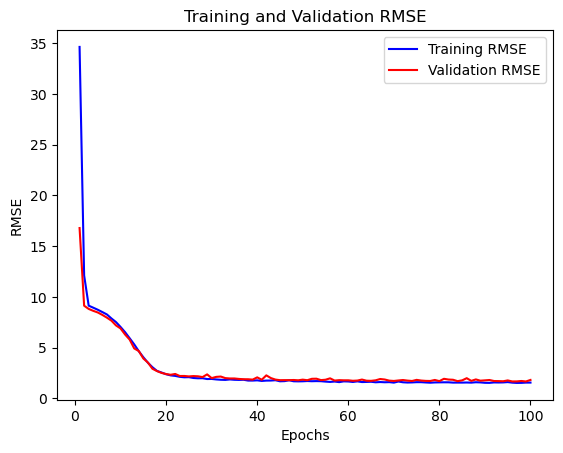

In [52]:
# Define a custom metric function for RMSE
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

# Define a function to create the model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(train.shape[1],)),  # Input layer with 64 neurons and ReLU activation
        Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
        Dense(1)  # Output layer with 1 neuron (no activation function for regression)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])  # Using MSE loss for regression and MSE as a metric
    return model

# Step 2: Define the model
model = create_model()

# Step 3: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Using MSE loss for regression and RMSE as a metric

# Step 4: Train the model
history = model.fit(train, train_labels, epochs=100, batch_size=32, validation_split=0.2)

# Extract RMSE values from history
train_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(1, len(train_rmse) + 1)

# Plot RMSE for training and validation data
plt.plot(epochs, train_rmse, 'b', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [53]:
# Assuming train and train_labels are defined (e.g., train is a pandas DataFrame, train_labels is a pandas Series)
# Perform k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = []
for train_indices, val_indices in kfold.split(train):
    X_train, X_val = train.iloc[train_indices], train.iloc[val_indices]
    y_train, y_val = train_labels.iloc[train_indices], train_labels.iloc[val_indices]
    model = create_model()
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    # Evaluate the model on validation data
    mse = model.evaluate(X_val, y_val, verbose=0)[0]
    mse_scores.append(mse)

# Display MSE scores
print("MSE scores:", mse_scores)
print("Mean MSE:", np.mean(mse_scores))
print("Root Mean Squared Error (RMSE):", np.sqrt(np.mean(mse_scores)))

MSE scores: [2.5323984622955322, 2.6317315101623535, 4.594822883605957, 2.2869298458099365, 4.868226051330566, 2.827194929122925, 4.00010871887207, 53.052879333496094, 1.8514368534088135, 4.025280952453613]
Mean MSE: 8.267100954055786
Root Mean Squared Error (RMSE): 2.8752566762040197
